# Sunburst Plots for Metabolites:

**Updated on:** 2024-04-12 14:05 CEST

In this Jupyter Notebook, we use the "CCEMetabolites_SunburstInfo" files generated by "StackedBarPlot_Metabolites.ipynb" notebook to create sunburst charts.

**Authors**: Abzer Kelminal (abzer.shah@uni-tuebingen.de) <br>
**Input file format**: .csv files <br>
**Outputs**: .svg images  <br>
**Dependencies**: numpy, pandas, plotly

---
**Necessary input files**:
 The "CCEMetabolites_SunburstInfo" csv files of all cycles: From Cycle 1 to Cycle 4
 
---

# 1. Loading packages and setting working directory

In [2]:
# installing necessary packages (omitted for now)
! pip install plotly

     ---------------------------------------- 0.0/15.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/15.2 MB 1.2 MB/s eta 0:00:14
      --------------------------------------- 0.2/15.2 MB 2.2 MB/s eta 0:00:07
     - -------------------------------------- 0.5/15.2 MB 3.0 MB/s eta 0:00:05
     - -------------------------------------- 0.8/15.2 MB 3.7 MB/s eta 0:00:04
     -- ------------------------------------- 1.1/15.2 MB 4.2 MB/s eta 0:00:04
     --- ------------------------------------ 1.5/15.2 MB 5.1 MB/s eta 0:00:03
     ----- ---------------------------------- 1.9/15.2 MB 5.6 MB/s eta 0:00:03
     ----- ---------------------------------- 2.2/15.2 MB 5.7 MB/s eta 0:00:03
     ------ --------------------------------- 2.6/15.2 MB 6.0 MB/s eta 0:00:03
     -------- ------------------------------- 3.1/15.2 MB 6.4 MB/s eta 0:00:02
     ---------- ----------------------------- 3.9/15.2 MB 7.4 MB/s

In [ ]:
! pip install -U kaleido #to save the plotly images as svg

In [1]:
# importing necessary modules
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
import kaleido
import datetime

In [2]:
# pip show kaleido             #to check if a particular dependency is already installed, here, kaleido

In [93]:
#Setting working directory
directory = input("Enter the path of the folder in the output cell:\n")
os.chdir(directory)

Enter the path of the folder in the output cell:
 G:\My Drive\CCE DATA\Figures\Sunburst Plots\Sunburst_Plots_Metabolites


In [94]:
#get the current working directory (to check)
path= os.getcwd()
path

'G:\\My Drive\\CCE DATA\\Figures\\Sunburst Plots\\Sunburst_Plots_Metabolites'

# 2. Load the input files

In [95]:
#Lists all the csv files in the working directory:

# to store files in a list
names = []

for x in os.listdir(): 
    if x.endswith(".csv"):
        print(x) # Prints only csv file present in My Folder
        names.append(x) #adding the filenames to the list 'names'

230309_CCEMetabolites_SunburstInfo_Cycle_1_day1.csv
230309_CCEMetabolites_SunburstInfo_Cycle_1_day2.csv
230309_CCEMetabolites_SunburstInfo_Cycle_1_day3.csv
230309_CCEMetabolites_SunburstInfo_Cycle_2_day1.csv
230309_CCEMetabolites_SunburstInfo_Cycle_2_day2.csv
230309_CCEMetabolites_SunburstInfo_Cycle_2_day3.csv
230309_CCEMetabolites_SunburstInfo_Cycle_2_day4.csv
230309_CCEMetabolites_SunburstInfo_Cycle_3_day1.csv
230309_CCEMetabolites_SunburstInfo_Cycle_3_day2.csv
230309_CCEMetabolites_SunburstInfo_Cycle_3_day3.csv
230309_CCEMetabolites_SunburstInfo_Cycle_4_day1.csv
230309_CCEMetabolites_SunburstInfo_Cycle_4_day2.csv


In [96]:
names[0]

'230309_CCEMetabolites_SunburstInfo_Cycle_1_day1.csv'

In [97]:
pd.read_csv(names[0])

,XID_mz_RT,CCE_P1706_39.mzxml,CCE_P1706_40.mzxml,CCE_P1706_41.mzxml,CCE_P1706_42.mzxml,CCE_P1706_43.mzxml,CCE_P1706_44.mzxml,CCE_P1706_45.mzxml,CCE_P1706_46.mzxml,CCE_P1706_47.mzxml,...,P_Canopus,F_Canopus,Cl_Canopus,B_Canopus,Br_Canopus,I_Canopus,C_N,O_C,H_C,avCox
0,X10014_383.17_4.475,231496.640,169520.640,85430.5800,123698.070,136391.560,553282.7500,143615.980,156429.440,115057.280,...,0,0,0,0,0,0,inf,0.421053,1.368421,-0.526316
1,X10019_422.192_4.28,0.000,0.000,1977.9626,0.000,0.000,2236.1567,0.000,3645.164,88398.750,...,0,0,0,0,0,0,20.0,0.300000,1.650000,-0.900000
2,X10025_618.298_4.28,0.000,0.000,0.0000,0.000,0.000,0.0000,0.000,0.000,0.000,...,0,0,0,0,0,0,6.0,0.233333,1.433333,-0.400000
3,X10026_363.144_4.397,35609.960,200192.810,320354.0300,150151.440,106224.660,101636.1000,171778.640,147606.780,75982.890,...,0,0,0,0,0,0,inf,0.368421,1.157895,-0.421053
4,X10027_372.165_4.282,109957.060,59936.140,91806.4100,193640.190,55770.310,66139.2700,51105.605,160126.280,120929.300,...,0,0,0,0,0,0,17.0,0.470588,1.470588,-0.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,X9974_339.144_4.274,153658.830,383272.700,497484.7000,235199.030,303141.030,313509.0300,212790.270,143530.110,131538.170,...,0,0,0,0,0,0,inf,0.411765,1.294118,-0.470588
8385,X9982_352.176_4.273,76028.660,22135.640,21525.7700,25782.162,102975.860,80680.1250,38197.440,123377.880,32735.719,...,0,0,0,0,0,0,3.8,0.105263,1.105263,-0.105263
8386,X9987_437.144_4.413,365559.780,138394.310,269583.1000,228081.170,357819.400,111557.5400,193260.160,385877.000,190685.800,...,0,0,0,0,0,0,inf,0.476190,1.142857,-0.190476
8387,X9997_358.186_4.221,68011.160,140639.360,105434.2340,86858.030,197898.840,92804.7660,116395.170,215710.190,105797.990,...,0,0,0,0,0,0,17.0,0.411765,1.588235,-0.588235


# 3. Read the input files

Here, we read particular columns of the csv file, then replace NAN values to be empty. Finally, we add a column 'middle' with the cycle name of the file. This 'middle' will be used as the main branch (the centre part) of the sunburst chart.

In [132]:
# read the 1st csv file in the folder and showing only specific columns
df = pd.read_csv(names[0])[["ClassyFire.superclass","ClassyFire.class","ClassyFire.subclass","ClassyFire.level.5","Avg"]].replace(np.nan,' ')

<font color = 'red' size = 3> To include NA values in your sunburst plot, instead of replacing NaN values with a blank space as done in the previous line, you should replace them with 'Unknown'. This approach ensures that all data, including missing values, are represented in the visualization, providing a complete view of your dataset's distribution.</font>  

Ex:
<code> df = pd.read_csv(names[0])[["ClassyFire.superclass","ClassyFire.class","ClassyFire.subclass","ClassyFire.level.5","Avg"]].replace(np.nan,'Unknown') </code>

In [133]:
df['middle'] = np.array(['C1D1']*len(df)) # here add what you want to display in the middle circle of your sunburst plot. For ex: Liver

In [134]:
df.head()

,ClassyFire.superclass,ClassyFire.class,ClassyFire.subclass,ClassyFire.level.5,Avg,middle
0,Lipids and lipid-like molecules,Prenol lipids,Terpene lactones,,177304.370333,C1D1
1,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Amino acids and derivatives,26484.540275,C1D1
2,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Peptides,0.000000,C1D1
3,Lipids and lipid-like molecules,Prenol lipids,Terpene lactones,Diterpene lactones,137584.266250,C1D1
4,Organic acids and derivatives,Carboxylic acids and derivatives,Tricarboxylic acids and derivatives,,93198.663750,C1D1


In [135]:
df.shape # gives the number of rows and columns

(8389, 6)

# 4. Sunburst Chart visualization:

## i. Visualize the 1st sunburst chart:

In [136]:
fig= px.sunburst(df,
                 path=["middle","ClassyFire.superclass","ClassyFire.class","ClassyFire.subclass","ClassyFire.level.5"],
                 values="Avg", 
                 color='ClassyFire.superclass',
                 width=1000,height=1000,
                )
#fig.update_traces(labels=['',] * len(fig.data[0]['labels'])) # uncomment this line to turn off the labels in the plot
#fig.show(renderer='browser') #result shows in a browser window

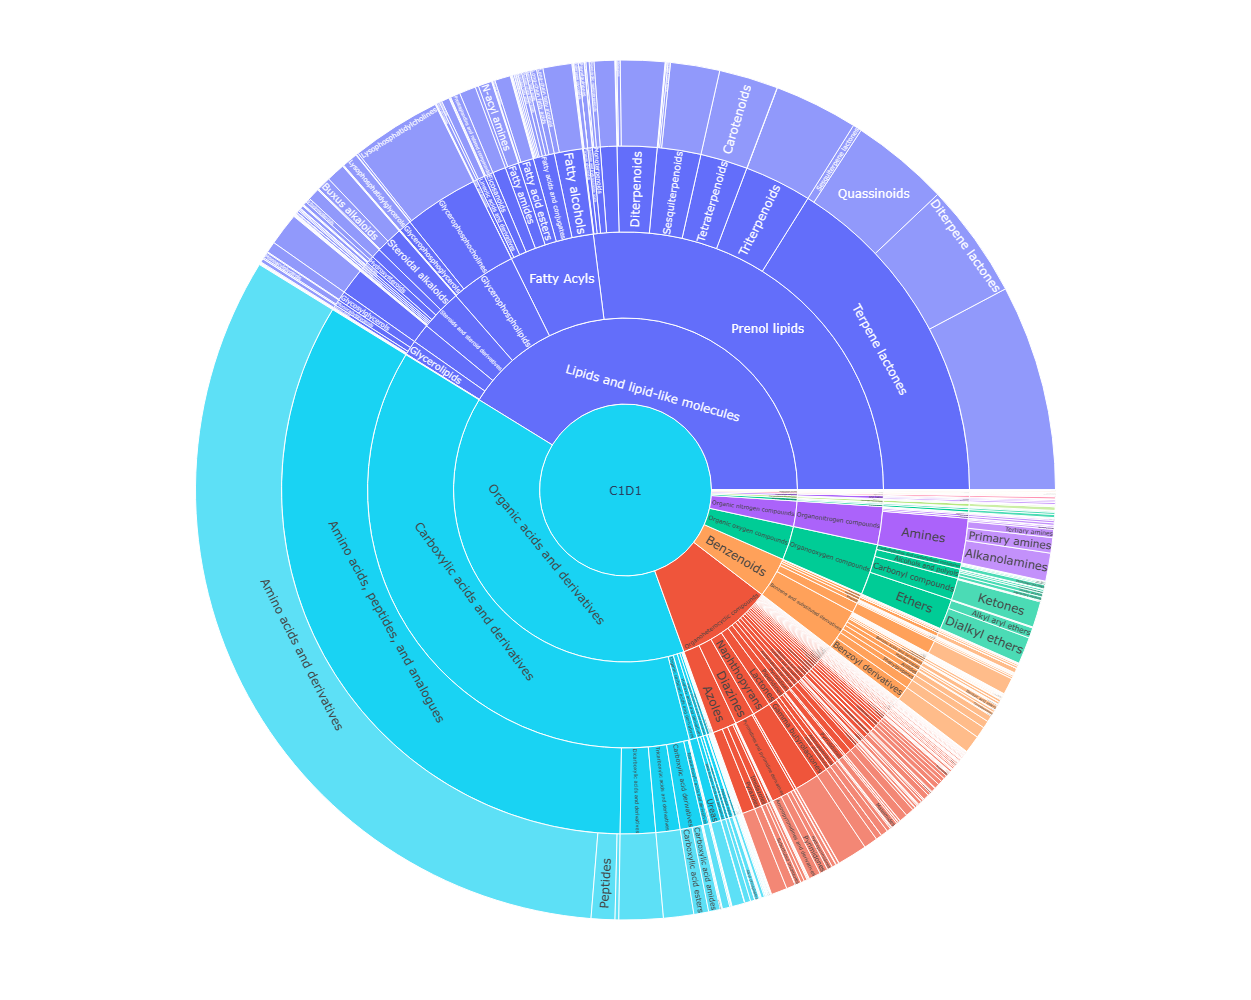

In [137]:
fig.show() # to show the result figure directly here

## ii. Changing the colors of Superclass levels in surburst charts:

In [140]:
# get all the unique levels of superclass into a set
unique_superclasses_set = set()  # create an empty set

for name in names:
    file = pd.read_csv(name)[["ClassyFire.superclass","ClassyFire.class","ClassyFire.subclass","ClassyFire.level.5","Avg"]].replace(np.nan,' ')
    unique_superclasses_in_file = set(file['ClassyFire.superclass'].dropna().unique()) # extract the unique values of the column
    unique_superclasses_set.update(unique_superclasses_in_file)  # update the set with unique values

<font color = 'red' size = 3> To include NA values in your sunburst plot, instead of replacing NaN values with a blank space as done in the previous line, you should replace them with 'Unknown'.</font>  

Ex:
<code> file = pd.read_csv(names)[["ClassyFire.superclass","ClassyFire.class","ClassyFire.subclass","ClassyFire.level.5","Avg"]].replace(np.nan,'Unknown') </code>

In [141]:
# Convert set to list to get all unique superclass names
unique_superclasses_list = list(unique_superclasses_set) 
unique_superclasses_list.sort()
unique_superclasses_list

['Alkaloids and derivatives',
 'Benzenoids',
 'Hydrocarbons',
 'Lignans, neolignans and related compounds',
 'Lipids and lipid-like molecules',
 'Nucleosides, nucleotides, and analogues',
 'Organic 1,3-dipolar compounds',
 'Organic acids and derivatives',
 'Organic nitrogen compounds',
 'Organic oxygen compounds',
 'Organohalogen compounds',
 'Organoheterocyclic compounds',
 'Organophosphorus compounds',
 'Organosulfur compounds',
 'Phenylpropanoids and polyketides']

<font color = 'red'> In the output shown above, the empty strings (`' '`) indicate that all NaN (not a number) values have been replaced with blanks. These blank values will not be represented in the sunburst chart. If you did not have NA values, you will not see the `' '`. To include missing data in your visualization, you could replace NaN values with a descriptive term like "Unknown," which would then appear in the output list and be included in the chart. </font> 

In [142]:
len(unique_superclasses_list) #length of you unique superclasses list

15

In [79]:
# previously used 15 colors manually
#color_list = ['#ff925f','#0152d5','#99d849','#a84ed5','#f09400','#5d3da9','#01673c','#e17fff','#625108','#0071c3','#993300','#01cc1d1a','#ff7987','#e7be8f','#902f52']

In [143]:
# color-blind friendly 20 colors
color_list = [
    '#117733',  # Green
    '#332288',  # Dark blue
    '#DDCC77',  # Pale yellow
    '#CC6677',  # Pinkish
    '#88CCEE',  # Sky blue
    '#AA4499',  # Purple
    '#44AA99',  # Teal
    '#999933',  # Olive green
    '#661100',  # Brown
    '#6699CC',  # Blue gray
    '#888888',  # Gray
    '#FFAABB',  # Pink
    '#DDDDDD',  # Light gray
    '#BBBBBB',  # Medium gray
    '#000000',  # Black
    '#B279A2',  # Soft purple
    '#6C8EBF',  # Soft blue
    '#D8B365',  # Sandy
    '#5AB4AC',  # Bluish green
    '#F5F5F5'   # Almost white
]

In [144]:
#create a new dictionary overall dictionary'color_dict_overall' with the 'color_list' colors assigned to 'class_list'
color_dict_overall =  dict(zip(unique_superclasses_list, color_list))
color_dict_overall

{'Alkaloids and derivatives': '#117733',
 'Benzenoids': '#332288',
 'Hydrocarbons': '#DDCC77',
 'Lignans, neolignans and related compounds': '#CC6677',
 'Lipids and lipid-like molecules': '#88CCEE',
 'Nucleosides, nucleotides, and analogues': '#AA4499',
 'Organic 1,3-dipolar compounds': '#44AA99',
 'Organic acids and derivatives': '#999933',
 'Organic nitrogen compounds': '#661100',
 'Organic oxygen compounds': '#6699CC',
 'Organohalogen compounds': '#888888',
 'Organoheterocyclic compounds': '#FFAABB',
 'Organophosphorus compounds': '#DDDDDD',
 'Organosulfur compounds': '#BBBBBB',
 'Phenylpropanoids and polyketides': '#000000'}

---
Add the corresponding new colors into a 'hex' column of the 'df' dataframe and visualize the sunburst chart with the new colors:

In [145]:
# Add a column 'hex' with 
df['hex'] = np.array([color_dict_overall[superclass] for superclass in df['ClassyFire.superclass']]) 

In [146]:
colorMapSubset = dict(zip(df.hex, df.hex)) #another dictionary with the colors
colorMapSubset

{'#88CCEE': '#88CCEE',
 '#999933': '#999933',
 '#FFAABB': '#FFAABB',
 '#332288': '#332288',
 '#6699CC': '#6699CC',
 '#117733': '#117733',
 '#661100': '#661100',
 '#AA4499': '#AA4499',
 '#888888': '#888888',
 '#CC6677': '#CC6677',
 '#44AA99': '#44AA99',
 '#000000': '#000000',
 '#BBBBBB': '#BBBBBB',
 '#DDDDDD': '#DDDDDD',
 '#DDCC77': '#DDCC77'}

In [147]:
df.head()

,ClassyFire.superclass,ClassyFire.class,ClassyFire.subclass,ClassyFire.level.5,Avg,middle,hex
0,Lipids and lipid-like molecules,Prenol lipids,Terpene lactones,,177304.370333,C1D1,#88CCEE
1,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Amino acids and derivatives,26484.540275,C1D1,#999933
2,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Peptides,0.000000,C1D1,#999933
3,Lipids and lipid-like molecules,Prenol lipids,Terpene lactones,Diterpene lactones,137584.266250,C1D1,#88CCEE
4,Organic acids and derivatives,Carboxylic acids and derivatives,Tricarboxylic acids and derivatives,,93198.663750,C1D1,#999933


In [148]:
fig = px.sunburst(df,
                  path=['middle','ClassyFire.superclass', 'ClassyFire.class', 'ClassyFire.subclass', 'ClassyFire.level.5'], #hierarchy
                  values='Avg',#the size of each segment in the plot
                  color='hex', #specifying the column for coloring
                  color_discrete_map=colorMapSubset,
                  width=1000,
                  height=1000)
fig.show(renderer='browser')

In [59]:
# creating a folder 'images'
if not os.path.exists("images"):
    os.mkdir("images")

In [20]:
fig.write_image("images/c1d1.svg") #writing the figure as SVG

## iii. FOR loop to get all Sunburst plots

Let's create a list with names for the output svg file:

In [149]:
names

['230309_CCEMetabolites_SunburstInfo_Cycle_1_day1.csv',
 '230309_CCEMetabolites_SunburstInfo_Cycle_1_day2.csv',
 '230309_CCEMetabolites_SunburstInfo_Cycle_1_day3.csv',
 '230309_CCEMetabolites_SunburstInfo_Cycle_2_day1.csv',
 '230309_CCEMetabolites_SunburstInfo_Cycle_2_day2.csv',
 '230309_CCEMetabolites_SunburstInfo_Cycle_2_day3.csv',
 '230309_CCEMetabolites_SunburstInfo_Cycle_2_day4.csv',
 '230309_CCEMetabolites_SunburstInfo_Cycle_3_day1.csv',
 '230309_CCEMetabolites_SunburstInfo_Cycle_3_day2.csv',
 '230309_CCEMetabolites_SunburstInfo_Cycle_3_day3.csv',
 '230309_CCEMetabolites_SunburstInfo_Cycle_4_day1.csv',
 '230309_CCEMetabolites_SunburstInfo_Cycle_4_day2.csv']

In [150]:
Date = datetime.date.today() # Get the current date
date_string = Date.strftime("%Y-%m-%d") # Format the date as YYYY-MM-DD

In [151]:
Figure_names = ['Cycle1_Day1', 'Cycle1_Day2', 'Cycle1_Day3',
                'Cycle2_Day1', 'Cycle2_Day2', 'Cycle2_Day3', 'Cycle2_Day4',
                'Cycle3_Day1', 'Cycle3_Day2', 'Cycle3_Day3',
                'Cycle4_Day1', 'Cycle4_Day2']

In [152]:
file_name = []
for name in range(len(Figure_names)):
    x = f"{date_string}_{Figure_names[name]}_Sunburst_Plot.svg"
    file_name.append(x)

In [153]:
file_name

['2024-04-12_Cycle1_Day1_Sunburst_Plot.svg',
 '2024-04-12_Cycle1_Day2_Sunburst_Plot.svg',
 '2024-04-12_Cycle1_Day3_Sunburst_Plot.svg',
 '2024-04-12_Cycle2_Day1_Sunburst_Plot.svg',
 '2024-04-12_Cycle2_Day2_Sunburst_Plot.svg',
 '2024-04-12_Cycle2_Day3_Sunburst_Plot.svg',
 '2024-04-12_Cycle2_Day4_Sunburst_Plot.svg',
 '2024-04-12_Cycle3_Day1_Sunburst_Plot.svg',
 '2024-04-12_Cycle3_Day2_Sunburst_Plot.svg',
 '2024-04-12_Cycle3_Day3_Sunburst_Plot.svg',
 '2024-04-12_Cycle4_Day1_Sunburst_Plot.svg',
 '2024-04-12_Cycle4_Day2_Sunburst_Plot.svg']

Also, defining cycle names to appear in the middle of each sunburst chart:

In [91]:
Cycle_names = ['Cycle1_Day1', 'Cycle1_Day2', 'Cycle1_Day3',
                'Cycle2_Day1', 'Cycle2_Day2', 'Cycle2_Day3', 'Cycle2_Day4',
                'Cycle3_Day1', 'Cycle3_Day2', 'Cycle3_Day3',
                'Cycle4_Day1', 'Cycle4_Day2']

Finally, creating all the sunburst charts in a for loop and automatically saving it in the images folder:

In [67]:
for i in range(len(names)):
    df = pd.read_csv(names[i])[["ClassyFire.superclass","ClassyFire.class","ClassyFire.subclass","ClassyFire.level.5","Avg"]].replace(np.nan,'')
    df['middle'] = np.array([Cycle_names[i]]*len(df))
    df.head()
    
    # Add a column 'hex' with 
    df['hex'] = np.array([color_dict_overall[superclass] for superclass in df['ClassyFire.superclass']]) 
    colorMapSubset = dict(zip(df.hex, df.hex)) 
    
    fig = px.sunburst(df,
                      path=['middle','ClassyFire.superclass', 'ClassyFire.class', 'ClassyFire.subclass', 'ClassyFire.level.5'],
                      values='Avg',
                      color='hex', 
                      color_discrete_map=colorMapSubset,
                      width=1000, height=1000)
    
    #fig.update_traces(labels=['',] * len(fig.data[0]['labels'])) #uncomment this line to turn off the labels in the plot
    
    fig.show(renderer='browser')
    fig.write_image(f"images/{file_name[i]}")

<font color = 'red' size = 3> To include NA values in your sunburst plot, instead of replacing NaN values with a blank space within the for loop, replace them with 'Unknown'.</font>  

Ex:
<code> df = pd.read_csv(names[i])[["ClassyFire.superclass","ClassyFire.class","ClassyFire.subclass","ClassyFire.level.5","Avg"]].replace(np.nan,'Unknown') </code>